In [6]:
!pip install datasets

In [7]:
!wget -O dataset-resized.zip https://raw.githubusercontent.com/garythung/trashnet/master/data/dataset-resized.zip

--2025-06-20 17:51:47--  https://raw.githubusercontent.com/garythung/trashnet/master/data/dataset-resized.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42834870 (41M) [application/zip]
Saving to: ‘dataset-resized.zip’

dataset-resized.zip 100%[===================>]  40.85M  --.-KB/s    in 0.1s    

2025-06-20 17:51:50 (429 MB/s) - ‘dataset-resized.zip’ saved [42834870/42834870]



In [8]:
!unzip dataset-resized.zip -d dataset-resized

Archive:  dataset-resized.zip
   creating: dataset-resized/dataset-resized/
  inflating: dataset-resized/dataset-resized/.DS_Store  
   creating: dataset-resized/__MACOSX/
   creating: dataset-resized/__MACOSX/dataset-resized/
  inflating: dataset-resized/__MACOSX/dataset-resized/._.DS_Store  
   creating: dataset-resized/dataset-resized/cardboard/
  inflating: dataset-resized/dataset-resized/cardboard/cardboard1.jpg  
  inflating: dataset-resized/dataset-resized/cardboard/cardboard10.jpg  
  inflating: dataset-resized/dataset-resized/cardboard/cardboard100.jpg  
  inflating: dataset-resized/dataset-resized/cardboard/cardboard101.jpg  
  inflating: dataset-resized/dataset-resized/cardboard/cardboard102.jpg  
  inflating: dataset-resized/dataset-resized/cardboard/cardboard103.jpg  
  inflating: dataset-resized/dataset-resized/cardboard/cardboard104.jpg  
  inflating: dataset-resized/dataset-resized/cardboard/cardboard105.jpg  
  inflating: dataset-resized/dataset-resized/cardboard/cardb

In [9]:
import os

print("Inside 'dataset-resized' folder:")
print(os.listdir("dataset-resized/dataset-resized"))

Inside 'dataset-resized' folder:
['glass', '.DS_Store', 'cardboard', 'metal', 'paper', 'plastic', 'trash']


In [10]:
dataset_path = "dataset-resized/dataset-resized"

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        count = len(os.listdir(folder_path))
        print(f"{folder}: {count} images")

glass: 501 images
cardboard: 403 images
metal: 410 images
paper: 594 images
plastic: 482 images
trash: 137 images


In [11]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [12]:
img_height, img_width = 224, 224
batch_size = 32

In [13]:
#  Data Augmentation + Generators

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [14]:
#  Load Pretrained EfficientNetV2B2 (Transfer Learning)

base_model = EfficientNetV2B2(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [15]:
#  Add Custom Classifier Head

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # 6 classes
])


In [16]:
#  Compile the Model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
#  Train the Model

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 93s 905ms/step - accuracy: 0.1934 - loss: 1.7866 - val_accuracy: 0.2048 - val_loss: 1.7352
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 421ms/step - accuracy: 0.2206 - loss: 1.7319 - val_accuracy: 0.2346 - val_loss: 1.7216
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 427ms/step - accuracy: 0.2338 - loss: 1.7383 - val_accuracy: 0.2346 - val_loss: 1.7229
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 428ms/step - accuracy: 0.2211 - loss: 1.7417 - val_accuracy: 0.2346 - val_loss: 1.7199
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 426ms/step - accuracy: 0.1877 - loss: 1.7411 - val_accuracy: 0.2346 - val_loss: 1.7225
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 422ms/step - accuracy: 0.2245 - loss: 1.7325 - val_accuracy: 0.2346 - val_loss: 1.7164
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 427ms/step - accuracy: 0.2332 - loss: 1.7179 - val_accuracy: 0.2346 - val_loss: 1.7186
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 425ms/step - accuracy: 0.2348 - loss: 1.7228 - val_accu

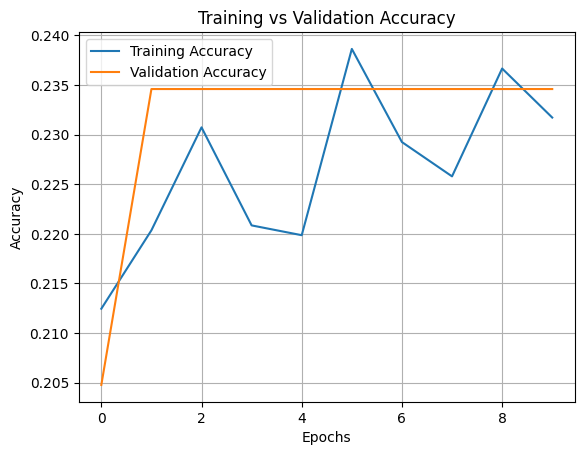

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()
